<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time Series Analysis</a></span></li><li><span><a href="#Stationarity-of-Time-Series" data-toc-modified-id="Stationarity-of-Time-Series-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stationarity of Time Series</a></span></li><li><span><a href="#Trend-and-Seasonality" data-toc-modified-id="Trend-and-Seasonality-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Trend and Seasonality</a></span></li><li><span><a href="#Forecasting-Time-Series" data-toc-modified-id="Forecasting-Time-Series-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Forecasting Time Series</a></span><ul class="toc-item"><li><span><a href="#SARIMA-(Seasonal-Autoregressive-Integrated-Moving-Average)" data-toc-modified-id="SARIMA-(Seasonal-Autoregressive-Integrated-Moving-Average)-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>SARIMA (Seasonal Autoregressive Integrated Moving Average)</a></span><ul class="toc-item"><li><span><a href="#Hyperparamter-tuning-for-the-model" data-toc-modified-id="Hyperparamter-tuning-for-the-model-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Hyperparamter tuning for the model</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Prediction-of-Sales-10-weeks-later-of-the-last-date" data-toc-modified-id="Prediction-of-Sales-10-weeks-later-of-the-last-date-2.4.1.3"><span class="toc-item-num">2.4.1.3&nbsp;&nbsp;</span>Prediction of Sales 10 weeks later of the last date</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [295]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [157]:
data = pd.read_csv('sales_data_sample.csv', encoding='latin1')
data.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


In [158]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [159]:
data.shape

(2823, 25)

# Exploratory Data Analysis

Date is one of the most important feature of time series analysis. As we can see that the date is not in the right format to do analysis hence the format needs to be changed plus the dates are not sorted in any order which also needs to be sorted in ascending order -> 2003 to 2005.

In [160]:
data['ORDERDATE'][0]

'2/24/2003 0:00'

In [161]:
data['ORDERDATE'] = data['ORDERDATE'].apply(lambda x: x.split()[0])
data['ORDERDATE'][0]

'2/24/2003'

In [162]:
# Ordering date in datetime format
def orderdate(date):
    a, b, c = date.split('/')
    res = c+'-'+a+'-'+b
    return res

for i in range(data.shape[0]):
    data['ORDERDATE'][i] = pd.to_datetime(orderdate(data['ORDERDATE'][i]), errors='coerce').date()

# Sort Date column
data = data.sort_values(by='ORDERDATE')
data = data.set_index(pd.DatetimeIndex(data['ORDERDATE']))

In [163]:
data.head(2).append(data.tail(2))

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,2003-01-06,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,2003-01-06,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2005-05-31,10424,44,61.41,2,2702.04,2005-05-31,In Process,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2005-05-31,10425,38,99.41,7,3777.58,2005-05-31,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium


In [316]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [332]:
# Look for null values if any
pd.DataFrame(data.isnull().sum())

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


Important columns do not have any null value hence it is fine.<br>
Now lets look at the distribution of numerical variables

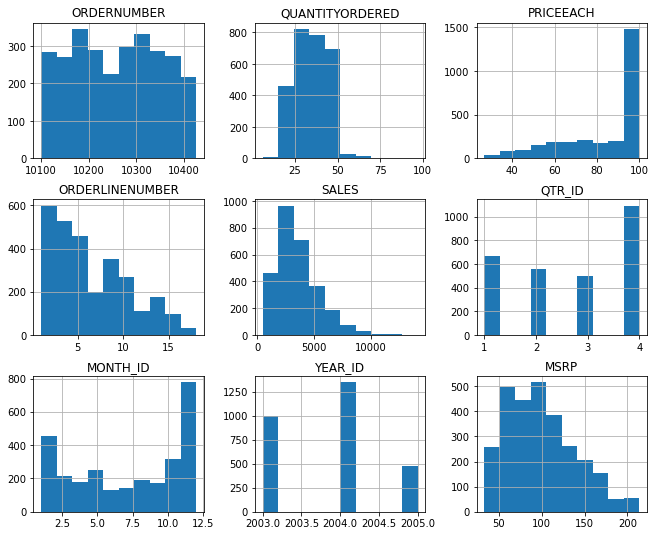

In [315]:
fg, ax = plt.subplots(figsize=(11, 9))
data.hist(ax=ax)
plt.show()

Correlation Analysis

<AxesSubplot:>

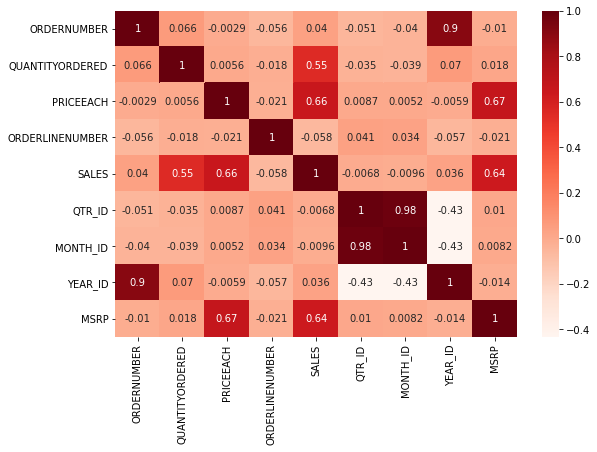

In [325]:
fg, ax = plt.subplots(figsize=(9,6))
sns.heatmap(data.corr(), cmap='Reds', annot=True, ax=ax)

MSRP vs PriceEach

Text(0.5, 1.0, 'MSRP vs PriceEach')

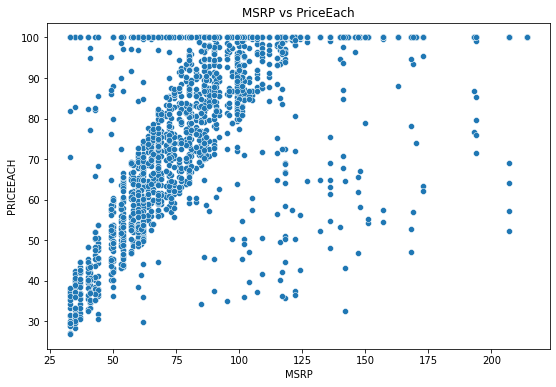

In [335]:
fg, ax = plt.subplots(figsize=(9,6))   
sns.scatterplot(data['MSRP'], data['PRICEEACH'], ax=ax)
ax.set_title('MSRP vs PriceEach')

Quantity Ordered vs Sales

Text(0.5, 1.0, 'QuantityOrdered vs Sales wrt Dealsize')

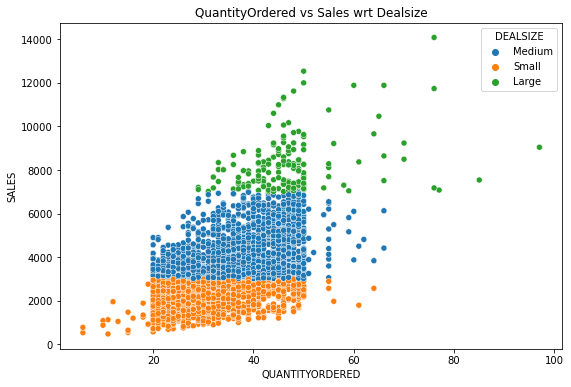

In [342]:
fg, ax = plt.subplots(figsize=(9,6))   
sns.scatterplot(data['QUANTITYORDERED'], data['SALES'], hue=data['DEALSIZE'], ax=ax)
ax.set_title('QuantityOrdered vs Sales wrt Dealsize')

Text(0.5, 1.0, 'QuantityOrdered vs Sales wrt Priceeach')

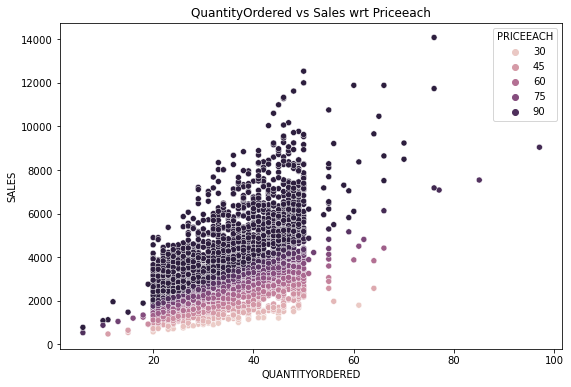

In [343]:
fg, ax = plt.subplots(figsize=(9,6))   
sns.scatterplot(data['QUANTITYORDERED'], data['SALES'], hue=data['PRICEEACH'], ax=ax)
ax.set_title('QuantityOrdered vs Sales wrt Priceeach')

Sales in all years

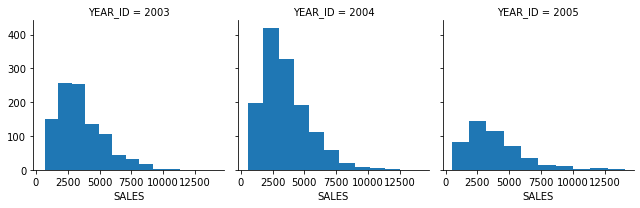

In [344]:
fg=sns.FacetGrid(data, col='YEAR_ID')
fg.map(plt.hist, 'SALES')

Top 10 countries by Sales

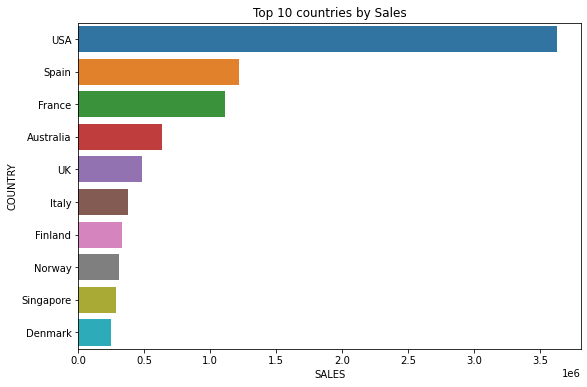

In [346]:
top_ten = data.groupby('COUNTRY').sum().sort_values(by='SALES', ascending=False).head(10)[['SALES']]
fg, ax = plt.subplots(figsize=(9,6))
sns.barplot(top_ten['SALES'], top_ten.index, ax=ax)
plt.title('Top 10 countries by Sales')
plt.show()

Monthly Revenue in All Years

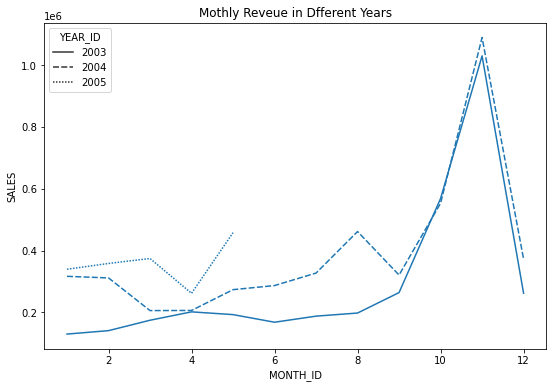

In [348]:
mothly_reveue=data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
fg, ax = plt.subplots(figsize=(9,6))
sns.lineplot(x='MONTH_ID',y='SALES',style='YEAR_ID',data=mothly_reveue, ax=ax)
plt.title('Mothly Reveue in Dfferent Years')
plt.show()

Status Values in Total

Text(0.5, 1.0, 'Status Values')

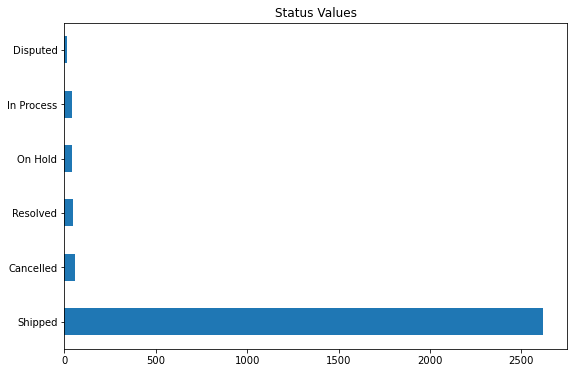

In [350]:
fg, ax = plt.subplots(figsize=(9,6))
data['STATUS'].value_counts().plot(kind='barh', ax=ax)
plt.title('Status Values')

Lets now look at the type of products that this store sells on which time series analysis could be done individually 

In [351]:
data['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [352]:
products = data['PRODUCTLINE'].value_counts().index
product_values = data['PRODUCTLINE'].value_counts().values

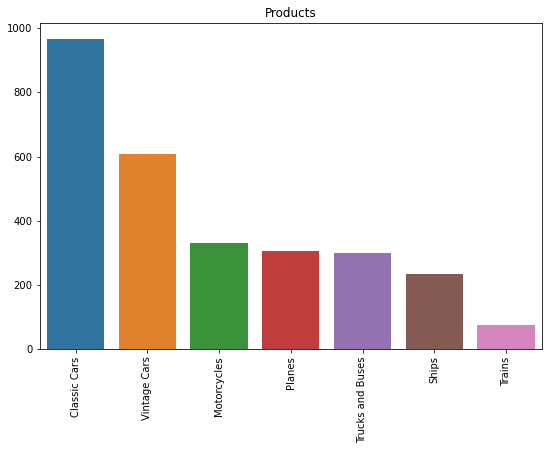

In [353]:
fg, ax = plt.subplots(figsize=(9,6))
sns.barplot(products, product_values, ax=ax)
plt.xticks(rotation=90)
plt.title('Products')
plt.show()

Seems to be a transport industry sales dataset

# Time Series Analysis

## Time Series Analysis

For time series analysis, we will consider 4 components of this industry namely: Classic Cars, Vintage Cars, Motorcycles, and Planes. Downsampling of data is done from days to weeks in order to understand the trend more clearly.

In [168]:
pd.plotting.register_matplotlib_converters()

<AxesSubplot:xlabel='ORDERDATE'>

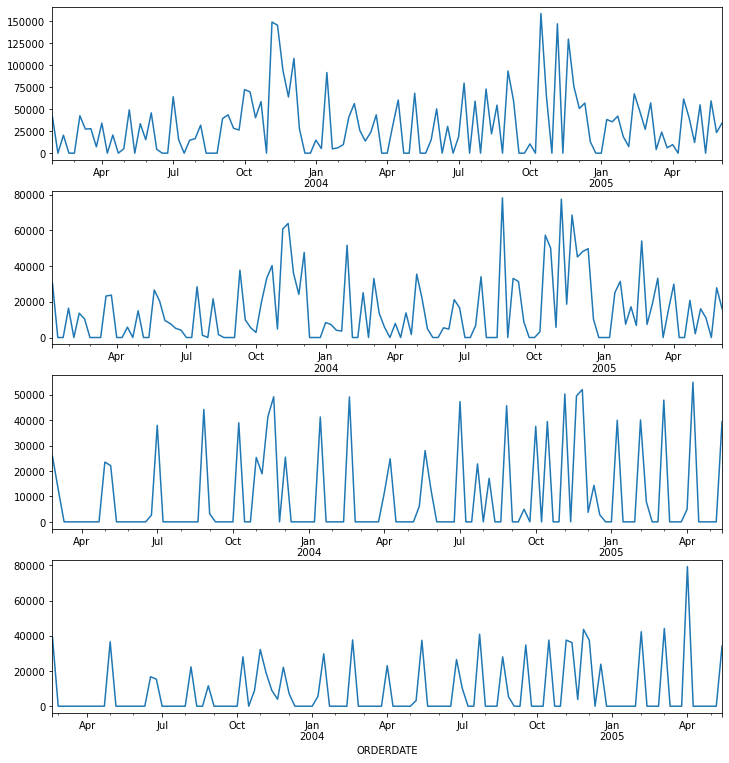

In [186]:
# Converting to float
data['SALES'] = data['SALES'] * 1.0

sales_classic_cars = data[data.PRODUCTLINE == 'Classic Cars']['SALES']
sales_vintage_cars = data[data.PRODUCTLINE == 'Vintage Cars']['SALES']
sales_motorcycles = data[data.PRODUCTLINE == 'Motorcycles']['SALES']
sales_planes = data[data.PRODUCTLINE == 'Planes']['SALES']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 13))

sales_classic_cars.resample('W').sum().plot(ax = ax1)
sales_vintage_cars.resample('W').sum().plot(ax = ax2)
sales_motorcycles.resample('W').sum().plot(ax = ax3)
sales_planes.resample('W').sum().plot(ax = ax4)

For Cars particularly - Classic and Vintage, we can see that their sales ais mostly during the end of the year as there clear peaks in their graphs respectively whereas in for motorcycles, sales is moderate throughout the year and lastly for planes as it is not a common transport, their sales is quite less compared to the rest.

## Stationarity of Time Series

In order to use time series forecasting models, we need to ensure that our time series data is stationary i.e constant mean, constant variance and constant covariance with time.<br>

In [189]:
from statsmodels.tsa.stattools import adfuller

In [190]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)

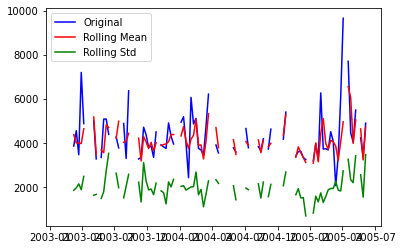

Results of Dickey-Fuller Test:
ADF Statistic: -29.934713
p-value: 0.000000
Critical Values:
1% -3.437137538234527
5% -2.8645366106945414
10% -2.568365556798649


In [191]:
# Testing stationarity of Classic Cars
test_stationarity(sales_classic_cars)

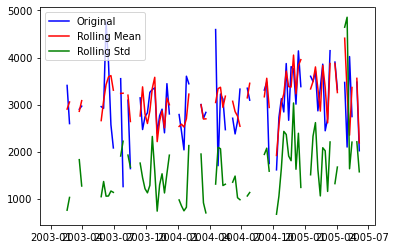

Results of Dickey-Fuller Test:
ADF Statistic: -26.890724
p-value: 0.000000
Critical Values:
1% -3.4411869900487906
5% -2.866321181236609
10% -2.569316262893616


In [192]:
# Testing stationarity of Vintage Cars
test_stationarity(sales_vintage_cars)

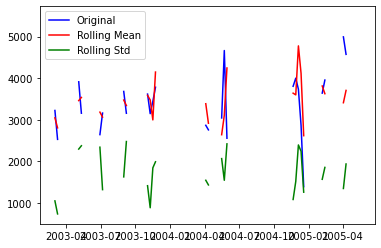

Results of Dickey-Fuller Test:
ADF Statistic: -17.677555
p-value: 0.000000
Critical Values:
1% -3.4503224123605194
5% -2.870338478726661
10% -2.571457612488522


In [193]:
# Testing stationarity of Motorcycles
test_stationarity(sales_motorcycles)

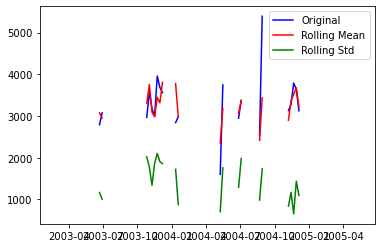

Results of Dickey-Fuller Test:
ADF Statistic: -8.403836
p-value: 0.000000
Critical Values:
1% -3.4524859843440754
5% -2.871288184343229
10% -2.571964047565425


In [194]:
# Testing stationarity of Planes
test_stationarity(sales_planes)

The p-value is quite low, Rolling mean is quit inline with orignal mean, and also the rolling std is quite low and constant hence we can say that forecasting can be done on the data without any further transformations.

## Trend and Seasonality

In [250]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [261]:
# Plotting seasonality and trend
def plot_timeseries(sales):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(sales, model = 'additive',freq=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');

    plt.title('Decomposition Plots')

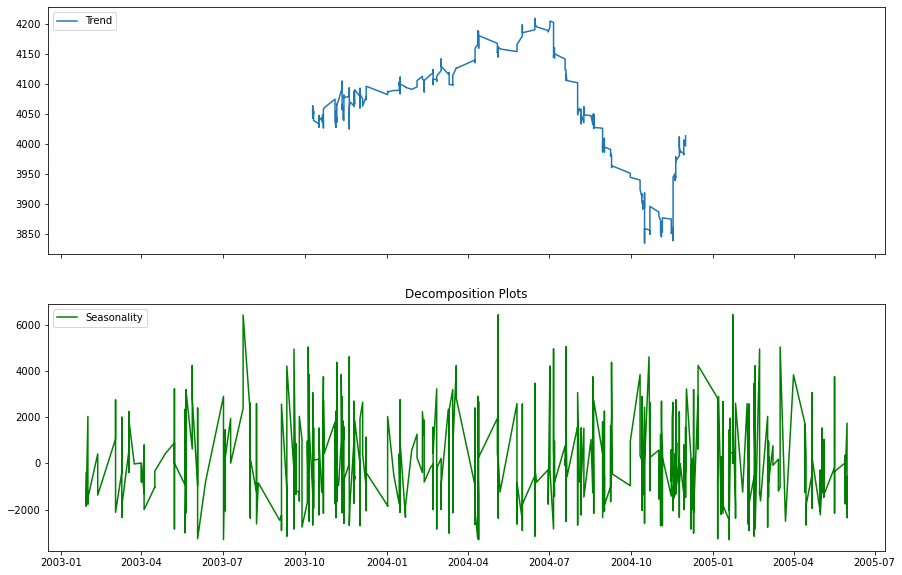

In [262]:
# Plotting seasonality and trend for classic cars
plot_timeseries(sales_classic_cars)

As we can see that there is some trend present in the data hence the forecasting model used will consider this factor. And other transports didn't have enough data for seasonality, trend display.

## Forecasting Time Series

### SARIMA (Seasonal Autoregressive Integrated Moving Average)

<AxesSubplot:xlabel='ORDERDATE'>

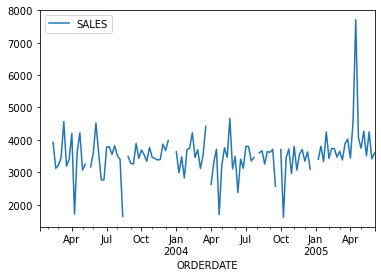

In [270]:
data_sarima = data.resample('W').mean()
data_sarima = data_sarima[['SALES']]
data_sarima.plot()

#### Hyperparamter tuning for the model

p, q, and d values are needed found out using gridsearch to get the lowest AIC score

In [298]:
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [273]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [281]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(data_sarima,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2172.6943495201804
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1906.9078882003114
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1709.8235162567998
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1498.6377923004559
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1728.8928754372043
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1695.5978744425856
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1524.9530636390928
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1500.452961415781
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2065.590355879868
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1806.7992369857482
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1693.059689396307
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1476.6257529485229
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1729.286949381615
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1677.2462501746918
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1526.9411606601918
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1478.6184017572734
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1863.8113093292877
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1695.9476537660

The hyperparameters chosen are - ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1455.9411423251331

#### Fitting the model

In [282]:
# Fitting the data to SARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(data_sarima,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sarima = model_sarima.fit()

print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9107      0.076    -12.032      0.000      -1.059      -0.762
ma.S.L12      -0.7952      0.202     -3.931      0.000      -1.192      -0.399
sigma2      4.511e+05   4.82e+04      9.360      0.000    3.57e+05    5.46e+05


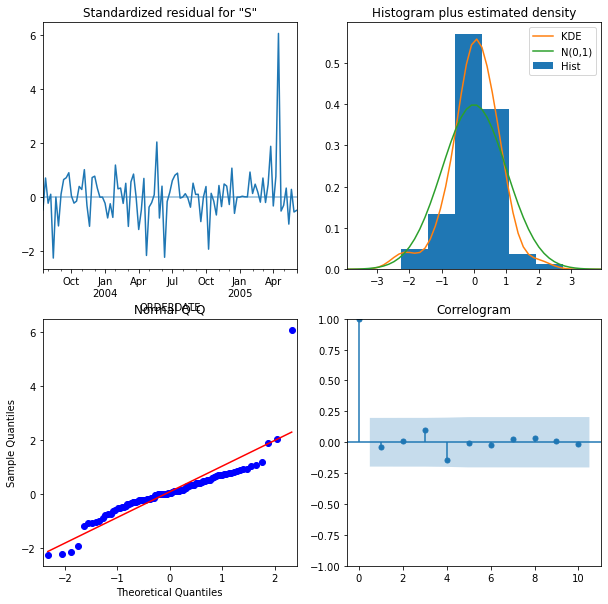

In [283]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()

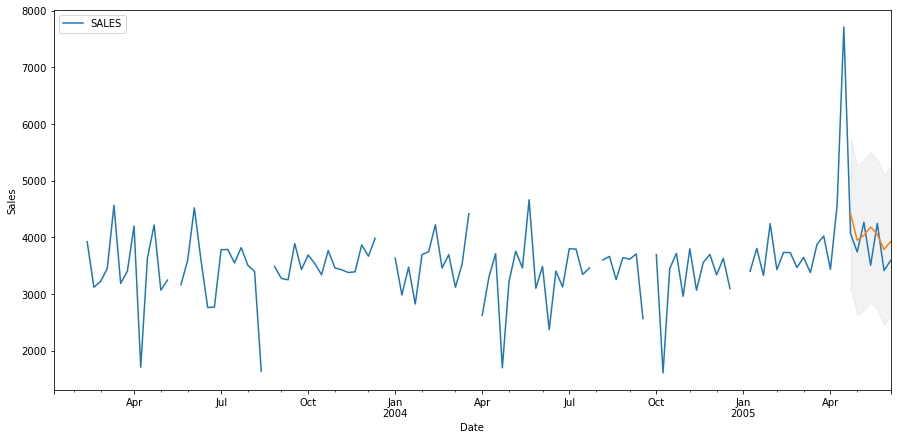

Root Mean Squared Error:  369.39329784105246


In [310]:
pred = results_sarima.get_prediction(start=pd.to_datetime('2005-04-24'), dynamic = False) 

pred_ci = pred.conf_int() 

ax = data_sarima["2003":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

data_sarima_forecasted = pred.predicted_mean
data_sarima_truth = data_sarima["2005-04-24":]

# Calculating the error
rms_sarima = math.sqrt(mean_squared_error(data_sarima_truth, data_sarima_forecasted))
print("Root Mean Squared Error: ", rms_sarima)

In [311]:
data.tail(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2005-05-31,10424,44,61.41,2,2702.04,2005-05-31,In Process,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2005-05-31,10425,38,99.41,7,3777.58,2005-05-31,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium


#### Prediction of Sales 10 weeks later of the last date

In [312]:
forecast = results_sarima.forecast(steps=10) # making a forecast of 10 weeks later of the last date in the 'ORDERDATE' column
print(forecast.astype('int')) #displays the sales forecast as type integer

2005-06-12    4068
2005-06-19    3449
2005-06-26    3918
2005-07-03    4486
2005-07-10    4764
2005-07-17    4338
2005-07-24    3925
2005-07-31    4122
2005-08-07    4059
2005-08-14    4161
Freq: W-SUN, Name: predicted_mean, dtype: int32
